In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load Datasets
df1 = pd.read_csv(r'C:\Users\123ad\Downloads\district wise rainfall normal.csv')
df2 = pd.read_csv(r'C:\Users\123ad\Downloads\rainfall in india 1901-2015.csv')

In [3]:
# Preprocessing df1 (Normal Rainfall data)
df1 = df1.dropna(subset=['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',
                         'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'])
df1['ANNUAL_NORMAL'] = df1[[
    'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',
    'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].sum(axis=1)

In [4]:
# Preprocessing df2 (Yearly Rainfall data)
df2 = df2.dropna(subset=['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',
                         'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'])
df2['ANNUAL'] = df2[[
    'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',
    'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].sum(axis=1)

In [5]:
# Feature Engineering: create target label for classification (based on annual rainfall threshold)
df2['RainCategory'] = df2['ANNUAL'].apply(lambda x: 'Low' if x < 1000 else 'High')

### EDA



In [9]:
# Basic Info
print("Dataset Overview:\n")
print(df2.head())
print("\nInfo:\n")
print(df2.info())
print("\nMissing Values:\n")
print(df2.isnull().sum())

Dataset Overview:

                 SUBDIVISION  YEAR   JAN    FEB   MAR    APR    MAY    JUN  \
0  ANDAMAN & NICOBAR ISLANDS  1901  49.2   87.1  29.2    2.3  528.8  517.5   
1  ANDAMAN & NICOBAR ISLANDS  1902   0.0  159.8  12.2    0.0  446.1  537.1   
2  ANDAMAN & NICOBAR ISLANDS  1903  12.7  144.0   0.0    1.0  235.1  479.9   
3  ANDAMAN & NICOBAR ISLANDS  1904   9.4   14.7   0.0  202.4  304.5  495.1   
4  ANDAMAN & NICOBAR ISLANDS  1905   1.3    0.0   3.3   26.9  279.5  628.7   

     JUL    AUG    SEP    OCT    NOV    DEC  ANNUAL  Jan-Feb  Mar-May  \
0  365.1  481.1  332.6  388.5  558.2   33.6  3373.2    136.3    560.3   
1  228.9  753.7  666.2  197.2  359.0  160.5  3520.7    159.8    458.3   
2  728.4  326.7  339.0  181.2  284.4  225.0  2957.4    156.7    236.1   
3  502.0  160.1  820.4  222.2  308.7   40.1  3079.6     24.1    506.9   
4  368.7  330.5  297.0  260.7   25.4  344.7  2566.7      1.3    309.7   

   Jun-Sep  Oct-Dec RainCategory  
0   1696.3    980.3         High  
1  

In [8]:
# Statistical Description
print("\nStatistical Summary:\n")
print(df2.describe())


Statistical Summary:

              YEAR          JAN          FEB          MAR          APR  \
count  4090.000000  4090.000000  4090.000000  4090.000000  4090.000000   
mean   1958.321271    18.818484    21.644792    27.252494    42.714548   
std      33.148944    33.521719    35.762010    46.829179    67.264863   
min    1901.000000     0.000000     0.000000     0.000000     0.000000   
25%    1930.000000     0.600000     0.600000     1.000000     3.000000   
50%    1959.000000     5.900000     6.600000     7.800000    15.500000   
75%    1987.000000    21.950000    26.600000    31.100000    49.375000   
max    2015.000000   583.700000   403.500000   605.600000   595.100000   

               MAY          JUN          JUL          AUG          SEP  \
count  4090.000000  4090.000000  4090.000000  4090.000000  4090.000000   
mean     84.868044   228.928020   346.496968   289.897506   197.003056   
std     122.556801   233.535693   269.352685   187.702293   135.266708   
min       0.00

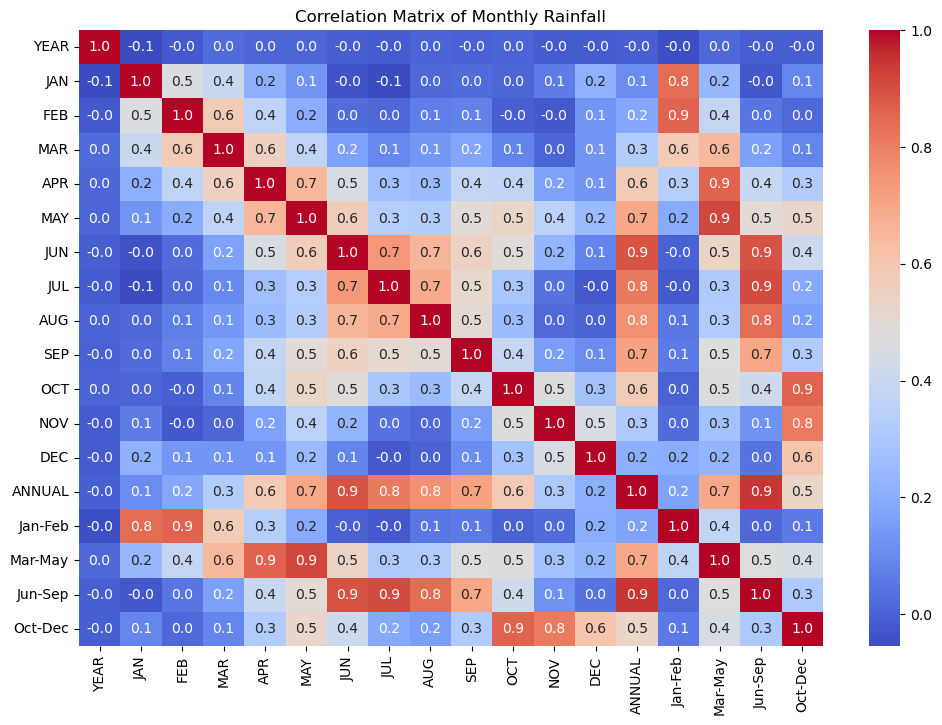

In [10]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df2.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Correlation Matrix of Monthly Rainfall')
plt.show()

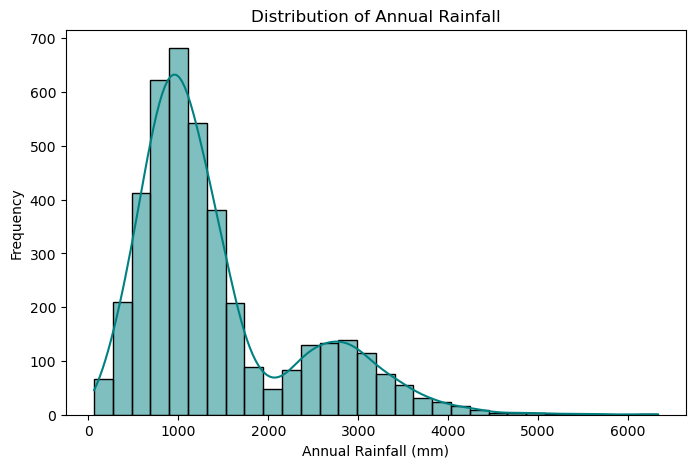

In [11]:
# Distribution of Annual Rainfall
plt.figure(figsize=(8, 5))
sns.histplot(df2['ANNUAL'], kde=True, bins=30, color='teal')
plt.title('Distribution of Annual Rainfall')
plt.xlabel('Annual Rainfall (mm)')
plt.ylabel('Frequency')
plt.show()

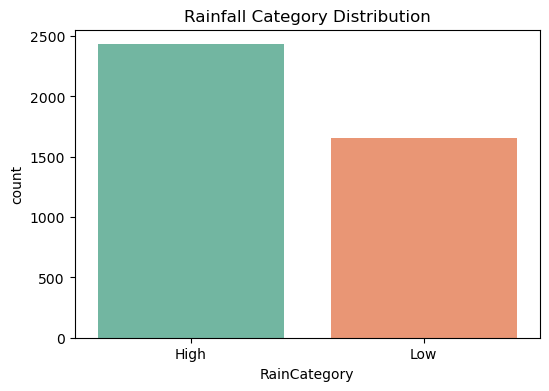

In [12]:
# Countplot for RainCategory (fixing future warning)
plt.figure(figsize=(6, 4))
sns.countplot(data=df2, x='RainCategory', hue='RainCategory', palette='Set2', legend=False)
plt.title('Rainfall Category Distribution')
plt.show()

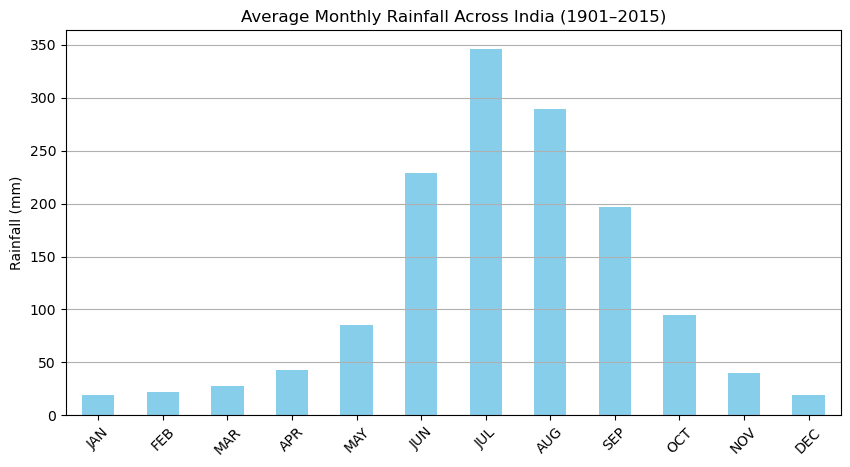

In [13]:
# Monthly Rainfall Trends
monthly_avg = df2[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',
                   'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].mean()
plt.figure(figsize=(10, 5))
monthly_avg.plot(kind='bar', color='skyblue')
plt.title('Average Monthly Rainfall Across India (1901–2015)')
plt.ylabel('Rainfall (mm)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

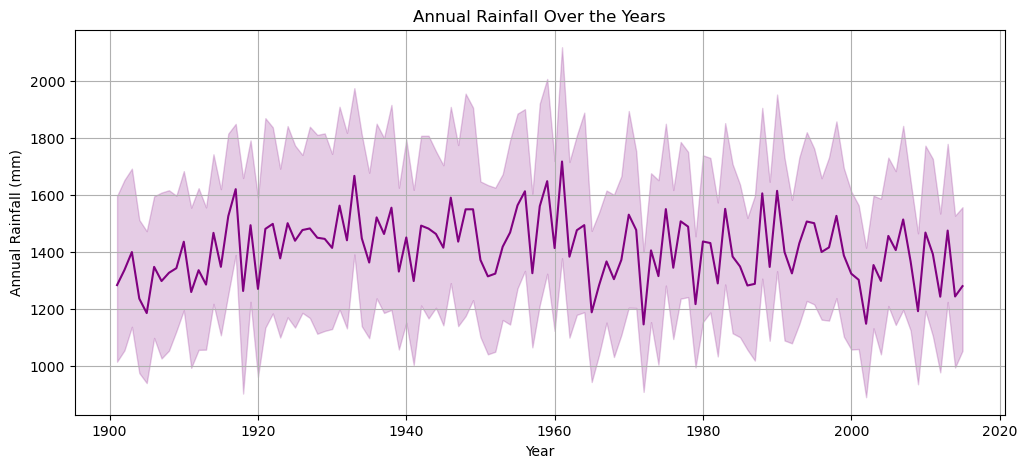

In [14]:
# Rainfall trend over years
plt.figure(figsize=(12, 5))
sns.lineplot(x='YEAR', y='ANNUAL', data=df2, color='purple')
plt.title('Annual Rainfall Over the Years')
plt.ylabel('Annual Rainfall (mm)')
plt.xlabel('Year')
plt.grid(True)
plt.show()

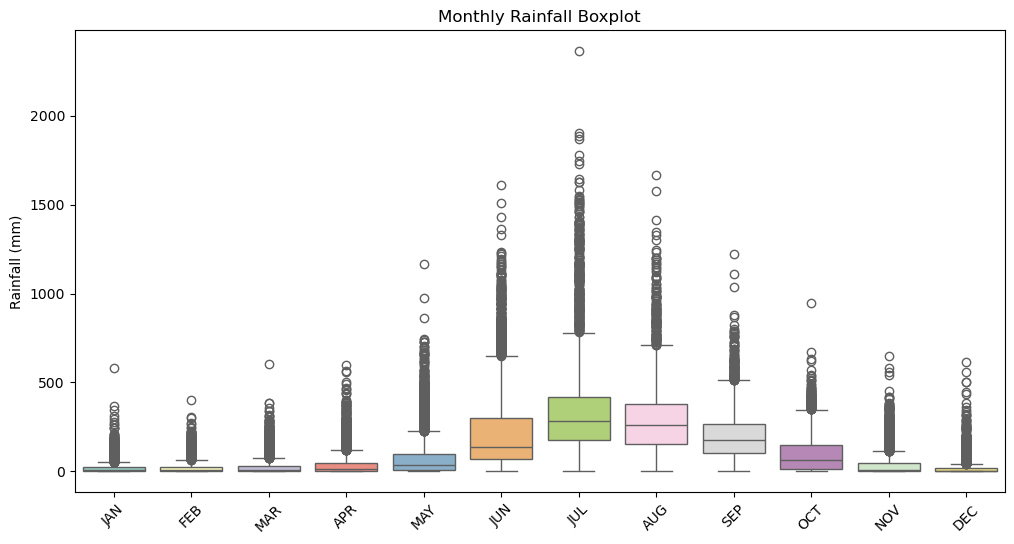

In [15]:
# Boxplot for Monthly Rainfall
plt.figure(figsize=(12, 6))
sns.boxplot(data=df2[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',
                      'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']], palette='Set3')
plt.title('Monthly Rainfall Boxplot')
plt.ylabel('Rainfall (mm)')
plt.xticks(rotation=45)
plt.show()

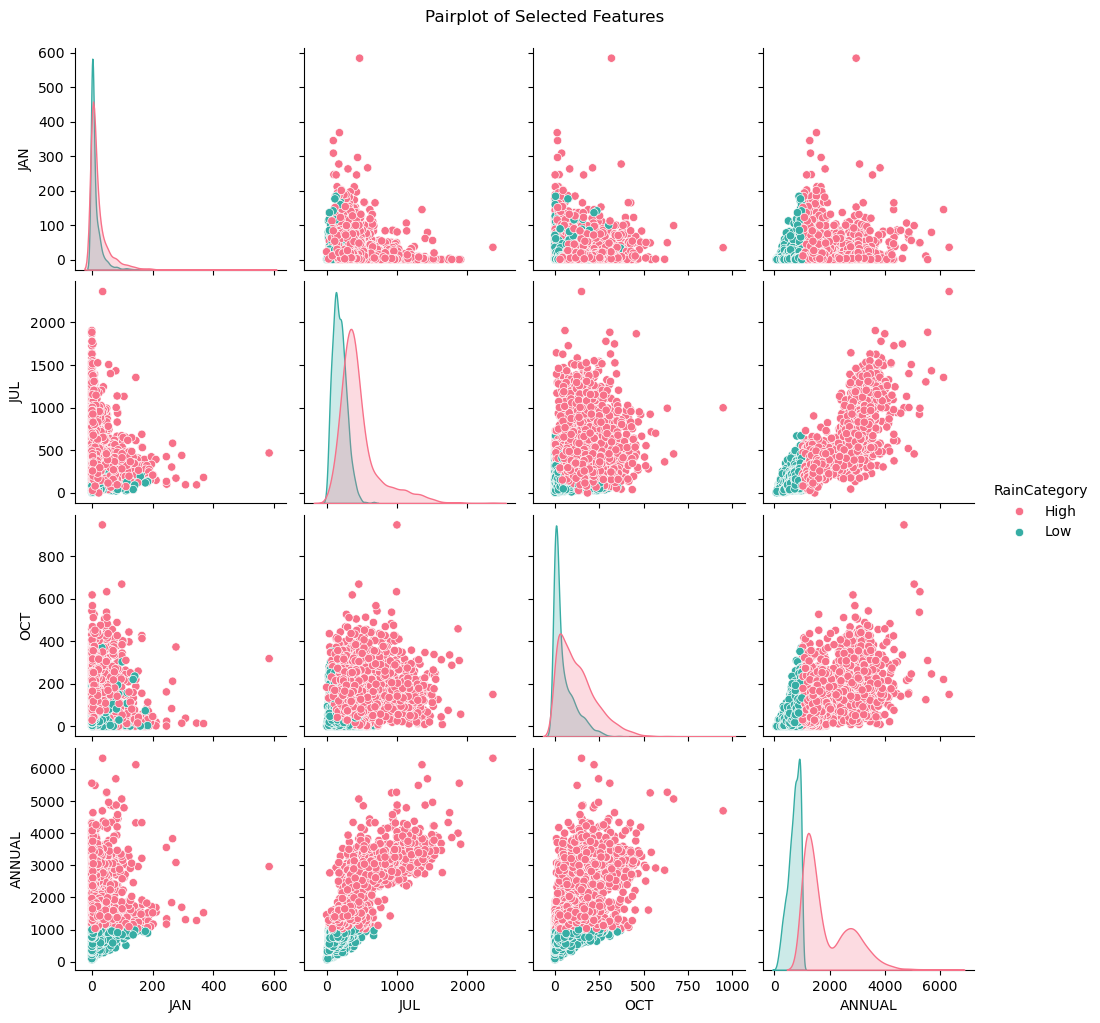

In [16]:

# Pairplot on subset
sns.pairplot(df2[['JAN', 'JUL', 'OCT', 'ANNUAL', 'RainCategory']], hue='RainCategory', palette='husl')
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

### Machine Learning Model

In [17]:
# Prepare Features and Target
features = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',
            'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
X = df2[features]
y = df2['RainCategory']

In [18]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Train Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
# Predict and Evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [21]:
# Print Results
print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", conf_matrix)


Accuracy: 0.9474327628361858

Classification Report:
               precision    recall  f1-score   support

        High       0.96      0.95      0.96       501
         Low       0.93      0.94      0.93       317

    accuracy                           0.95       818
   macro avg       0.94      0.95      0.94       818
weighted avg       0.95      0.95      0.95       818


Confusion Matrix:
 [[478  23]
 [ 20 297]]


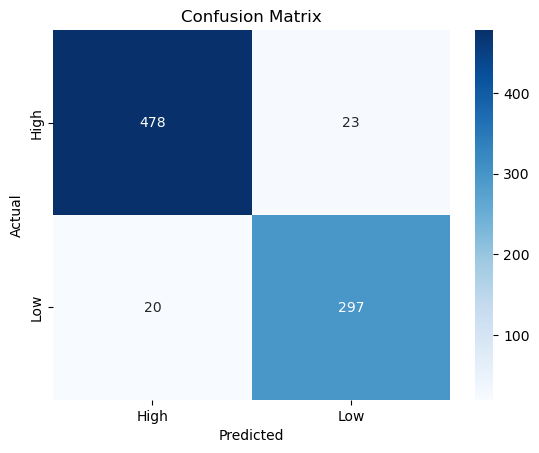

In [22]:

# Plot Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

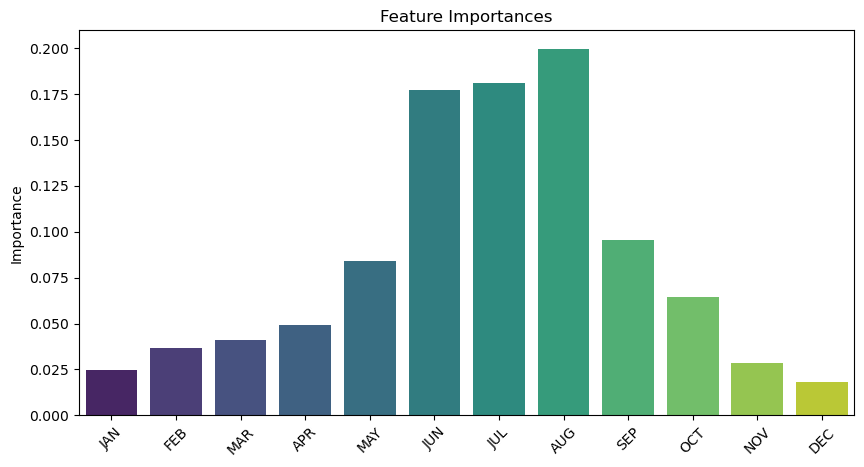

In [24]:

# Feature Importance
importances = model.feature_importances_
plt.figure(figsize=(10, 5))
sns.barplot(x=features, y=importances, hue=features, palette='viridis', legend=False)
plt.title('Feature Importances')
plt.xticks(rotation=45)
plt.ylabel('Importance')
plt.show()

